In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Filter the dataset to only include 'versicolor' and 'setosa' species
filtered_iris = iris[iris['species'].isin(['versicolor', 'setosa'])]

# Select only 'sepal_length' and 'sepal_width' variables
filtered_iris = filtered_iris[['sepal_length', 'sepal_width', 'species']]

# Label 'setosa' as 1 and 'versicolor' as -1
filtered_iris['species'] = filtered_iris['species'].map({'setosa': 1, 'versicolor': -1})

filtered_iris

,sepal_length,sepal_width,species
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
95,5.7,3.0,-1
96,5.7,2.9,-1
97,6.2,2.9,-1
98,5.1,2.5,-1


In [2]:
X = filtered_iris[['sepal_length', 'sepal_width']].to_numpy()
Y = filtered_iris['species'].to_numpy()

In [3]:
D = [(x, y) for x, y in zip(X, Y)];

In [4]:
def preactivation(x, w, b):
    return np.dot(x, w) + b

def sign(z):
    if z >= 0:
        return 1
    else:
        return -1

def postactivation(x, w, b):
    return sign(preactivation(x, w, b))

In [11]:
w0 = np.random.randn(2)
b0 = np.random.randn()

# check prediction
postactivation(X[0], w0, b0)

-1

In [12]:
def loss(x, y, w, b):
    y_hat = postactivation(x, w, b)
    return (1/4)*(y_hat - y)**2


def total_loss(D, w, b):
    return sum([loss(x, y, w, b) for x, y in D])

total_loss(D, w0, b0)

50.0

In [13]:
def perceptron_update(x, y, w, b):
    y_hat = postactivation(x, w, b)
    w = w - (1/2) * (y_hat - y) * x
    b = b - (1/2) * (y_hat - y)
    return w, b

In [ ]:
losses_over_time = []
w = w0
b = b0
for i in range(5_000):
    current_loss = total_loss(D, w, b)
    losses_over_time.append(current_loss)
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {current_loss}")
    for x, y in D:
        w, b = perceptron_update(x, y, w, b)


Iteration 0: Loss = 50.0
Iteration 100: Loss = 1.0
Iteration 200: Loss = 1.0
Iteration 300: Loss = 2.0
Iteration 400: Loss = 1.0
Iteration 500: Loss = 1.0
Iteration 600: Loss = 1.0
Iteration 700: Loss = 1.0
Iteration 800: Loss = 0.0
Iteration 900: Loss = 0.0
Iteration 1000: Loss = 0.0
Iteration 1100: Loss = 0.0
Iteration 1200: Loss = 0.0
Iteration 1300: Loss = 0.0
Iteration 1400: Loss = 0.0
Iteration 1500: Loss = 0.0
Iteration 1600: Loss = 0.0
Iteration 1700: Loss = 0.0
Iteration 1800: Loss = 0.0
Iteration 1900: Loss = 0.0
Iteration 2000: Loss = 0.0
Iteration 2100: Loss = 0.0
Iteration 2200: Loss = 0.0
Iteration 2300: Loss = 0.0
Iteration 2400: Loss = 0.0
Iteration 2500: Loss = 0.0
Iteration 2600: Loss = 0.0
Iteration 2700: Loss = 0.0
Iteration 2800: Loss = 0.0
Iteration 2900: Loss = 0.0
Iteration 3000: Loss = 0.0
Iteration 3100: Loss = 0.0
Iteration 3200: Loss = 0.0
Iteration 3300: Loss = 0.0
Iteration 3400: Loss = 0.0
Iteration 3500: Loss = 0.0
Iteration 3600: Loss = 0.0
Iteration 37

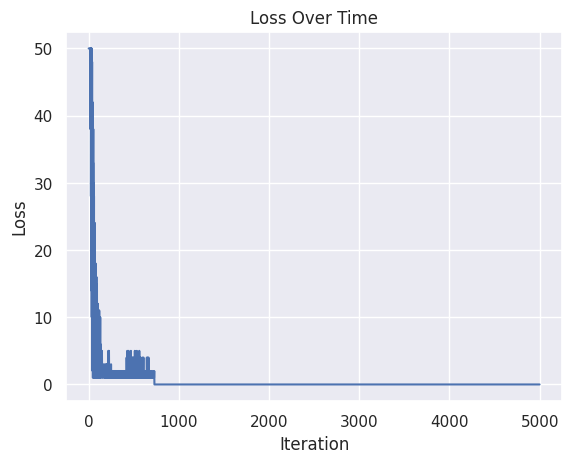

In [ ]:
t = range(len(losses_over_time))
plt.plot(t, losses_over_time)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.show()

In [ ]:
i = np.random.randint(len(D))
x, y = D[i]
y_hat = postactivation(x, w, b)
print(y_hat)
print(y)

-1
-1


In [ ]:
w

array([-80.06058746, 101.36845366])

In [ ]:
b

128.1223871854132

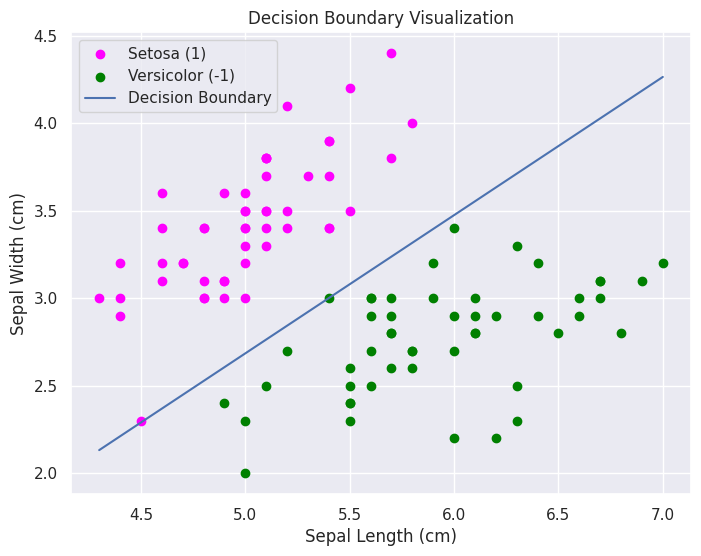

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(weights, bias, data):
    """
    Plots the decision boundary on the given dataset with setosa (1) in magenta and versicolor (-1) in green.

    Parameters:
    weights (array): Array of weights [w1, w2].
    bias (float): Bias term.
    data (DataFrame): Filtered iris dataset with sepal_length, sepal_width, and species labels.
    """
    # Extract features and labels
    X = data[['sepal_length', 'sepal_width']].values
    y = data['species'].values

    # Create figure and scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='magenta', label='Setosa (1)')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='green', label='Versicolor (-1)')

    # Generate decision boundary line
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]  # Rearranging equation of line

    plt.plot(x_vals, y_vals, 'b-', label='Decision Boundary')

    # Labels and title
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Decision Boundary Visualization')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Given weights and bias
weights = np.array([-80.06058746, 101.36845366])
bias = 128.1223871854132

# Visualize the decision boundary
plot_decision_boundary(weights, bias, filtered_iris)


In [ ]:
class SingleNeuron:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()